# Method Benchmarking

- **Creator**: Sebastian Birk (<sebastian.birk@helmholtz-munich.de>).
- **Affiliation:** Helmholtz Munich, Institute of Computational Biology (ICB), Talavera-López Lab
- **Date of Creation:** 06.01.2023
- **Date of Last Modification:** 06.03.2023

## 1. Setup

### 1.1 Import Libraries

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append("../../../autotalker")

In [3]:
import os
from datetime import datetime

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
import scanpy as sc
import scib
import seaborn as sns

from autotalker.benchmarking import compute_benchmarking_metrics
from autotalker.utils import (add_gps_from_gp_dict_to_adata,
                              extract_gp_dict_from_mebocost_es_interactions,
                              extract_gp_dict_from_nichenet_ligand_target_mx,
                              extract_gp_dict_from_omnipath_lr_interactions,
                              filter_and_combine_gp_dict_gps)

/home/sebastian.birk/.conda/envs/autotalker_hpc/lib/python3.9/site-packages/omnipath/_core/query/_query_validator.py:165: ResourceWarning: unclosed <ssl.SSLSocket fd=43, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('10.233.0.144', 60304), raddr=('178.62.7.222', 443)>
  res = Downloader(opt).maybe_download(
/home/sebastian.birk/.conda/envs/autotalker_hpc/lib/python3.9/site-packages/omnipath/_core/query/_query_validator.py:165: ResourceWarning: unclosed <ssl.SSLSocket fd=43, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('10.233.0.144', 60312), raddr=('178.62.7.222', 443)>
  res = Downloader(opt).maybe_download(
/home/sebastian.birk/.conda/envs/autotalker_hpc/lib/python3.9/site-packages/omnipath/_core/query/_query_validator.py:165: ResourceWarning: unclosed <ssl.SSLSocket fd=43, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('10.233.0.144', 60326), raddr=('178.62.7.222', 443)>
  res = Downloader(opt).ma

### 1.2 Define Parameters

In [4]:
#dataset = "seqfish_mouse_organogenesis_embryo2"
#cell_type_key = "celltype_mapped_refined"
spatial_key = "spatial"

/home/sebastian.birk/.conda/envs/autotalker_hpc/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [5]:
seqfish_mouse_organogenesis_embryo2_cell_type_colors = {
    "Epiblast" : "#635547",
    "Primitive Streak" : "#DABE99",
    "Caudal epiblast" : "#9e6762",
    "PGC" : "#FACB12",
    "Anterior Primitive Streak" : "#c19f70",
    "Notochord" : "#0F4A9C",
    "Def. endoderm" : "#F397C0",
    "Definitive endoderm" : "#F397C0",
    "Gut" : "#EF5A9D",
    "Gut tube" : "#EF5A9D",
    "Nascent mesoderm" : "#C594BF",
    "Mixed mesoderm" : "#DFCDE4",
    "Intermediate mesoderm" : "#139992",
    "Caudal Mesoderm" : "#3F84AA",
    "Paraxial mesoderm" : "#8DB5CE",
    "Somitic mesoderm" : "#005579",
    "Pharyngeal mesoderm" : "#C9EBFB",
    "Splanchnic mesoderm" : "#C9EBFB",
    "Cardiomyocytes" : "#B51D8D",
    "Allantois" : "#532C8A",
    "ExE mesoderm" : "#8870ad",
    "Lateral plate mesoderm" : "#8870ad",
    "Mesenchyme" : "#cc7818",
    "Mixed mesenchymal mesoderm" : "#cc7818",
    "Haematoendothelial progenitors" : "#FBBE92",
    "Endothelium" : "#ff891c",
    "Blood progenitors 1" : "#f9decf",
    "Blood progenitors 2" : "#c9a997",
    "Erythroid1" : "#C72228",
    "Erythroid2" : "#f79083",
    "Erythroid3" : "#EF4E22",
    "Erythroid" : "#f79083",
    "Blood progenitors" : "#f9decf",
    "NMP" : "#8EC792",
    "Rostral neurectoderm" : "#65A83E",
    "Caudal neurectoderm" : "#354E23",
    "Neural crest" : "#C3C388",
    "Forebrain/Midbrain/Hindbrain" : "#647a4f",
    "Spinal cord" : "#CDE088",
    "Surface ectoderm" : "#f7f79e",
    "Visceral endoderm" : "#F6BFCB",
    "ExE endoderm" : "#7F6874",
    "ExE ectoderm" : "#989898",
    "Parietal endoderm" : "#1A1A1A",
    "Low quality" : "#e6e6e6",
    "Cranial mesoderm" : "#77441B",
    "Anterior somitic tissues" : "#F90026",
    "Sclerotome" : "#A10037",
    "Dermomyotome" : "#DA5921",
    "Posterior somitic tissues" : "#E1C239",
    "Presomitic mesoderm" : "#9DD84A",
    "None" : "#D3D3D3"}

vizgen_merfish_mouse_liver_cell_type_colors = {
    "Hepatocyte" : "#635547",
    "Macrophage" : "#DABE99",
    "SEC" : "#9e6762",
    "Erythroid-cell_Erythroid-progenitor_Hepatocyte_MK_Neutrophil" : "#FACB12",
    "AEC_Potential-HSC" : "#c19f70",
    "HSC_Pre-B-cell" : "#0F4A9C",
    "MK" : "#F397C0",
    "AEC_Hepatocyte" : "#F397C0",
    "HSC" : "#EF5A9D",
    "Erythroid-progenitor_Hepatocyte_Neutrophil_Pre-B-cell" : "#EF5A9D",
    "Neutrophil" : "#C594BF",
    "Pre-B-cell" : "#DFCDE4"}

starmap_pluse_mouse_cns_cell_type_colors = {
    "Vascular and leptomeningeal cells" : "#635547",
    "Unannotated" : "#DABE99",
    "Pericytes" : "#9e6762",
    "Astrocytes" : "#FACB12",
    "Vascular smooth muscle cells" : "#c19f70",
    "Oligodendrocytes" : "#0F4A9C",
    "Vascular endothelial cells" : "#F397C0",
    "Microglia" : "#F397C0",
    "Oligodendrocyte precursor cells" : "#EF5A9D",
    "Olfactory ensheathing cells" : "#EF5A9D",
    "Telencephalon inhibitory interneurons" : "#C594BF",
    "Telencephalon projecting excitatory neurons" : "#DFCDE4",
    "Non-glutamatergic neuroblasts" : "#139992",
    "Cholinergic and monoaminergic neurons" : "#3F84AA",
    "Perivascular macrophages" : "#8DB5CE",
    "Choroid plexus epithelial cells" : "#005579",
    "Di- and mesencephalon inhibitory neurons" : "#C9EBFB",
    "Hindbrain neurons/Spinal cord neurons" : "#C9EBFB",
    "Telencephalon projecting inhibitory neurons" : "#B51D8D",
    "Olfactory inhibitory neurons" : "#532C8A",
    "Di- and mesencephalon excitatory neurons" : "#8870ad",
    "Glutamatergic neuroblasts" : "#8870ad",
    "Dentate gyrus granule neurons" : "#cc7818",
    "Ependymal cells" : "#cc7818",
    "Cerebellum neurons" : "#FBBE92",
    "Peptidergic neurons" : "#ff891c"}

nanostring_cosmx_human_nsclc_cell_type_colors = {
    "tumors" : "#635547",
    "neutrophil" : "#DABE99",
    "T CD8 memory" : "#9e6762",
    "fibroblast" : "#FACB12",
    "B-cell" : "#c19f70",
    "endothelial" : "#0F4A9C",
    "T CD4 memory" : "#F397C0",
    "T CD4 naive" : "#F397C0",
    "NK" : "#EF5A9D",
    "epithelial" : "#EF5A9D",
    "macrophage" : "#C594BF",
    "monocyte" : "#DFCDE4",
    "plasmablast" : "#139992",
    "Treg" : "#3F84AA",
    "T CD8 naive" : "#8DB5CE",
    "mDC" : "#005579",
    "pDC" : "#C9EBFB",
    "mast" : "#C9EBFB"}

### 1.3 Run Notebook Setup

In [6]:
sc.set_figure_params(figsize=(6, 6))

/home/sebastian.birk/.conda/envs/autotalker_hpc/lib/python3.9/site-packages/scanpy/_settings.py:447: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  IPython.display.set_matplotlib_formats(*ipython_format)


In [7]:
# Get time of notebook execution for timestamping saved artifacts
now = datetime.now()
current_timestamp = now.strftime("%d%m%Y_%H%M%S")

### 1.4 Configure Paths and Directories

In [8]:
data_folder_path = "../../datasets/srt_data/gold/"
figure_folder_path = f"../../figures/"
gp_data_folder_path = "../../datasets/gp_data" # gene program data
nichenet_ligand_target_mx_file_path = gp_data_folder_path + "/nichenet_ligand_target_matrix.csv"
omnipath_lr_interactions_file_path = gp_data_folder_path + "/omnipath_lr_interactions.csv"

In [9]:
# Create required directories
os.makedirs(figure_folder_path, exist_ok=True)

## 2. Method Benchmarking

- Run all notebooks in the ```method_benchmarking``` directory before continuing.

### 3.1 Latent Space Comparison

#### 3.1.1 Define Function

In [ ]:
def compute_latent_space_comparison(dataset,
                                    cell_type_colors,
                                    cell_type_key="cell_type",
                                    cell_type_groups=None,
                                    n_neighbors=12,
                                    run_number=5):
    # Configure figure folder path
    dataset_figure_folder_path = f"{figure_folder_path}/{dataset}/method_benchmarking/comparison/{current_timestamp}"
    os.makedirs(dataset_figure_folder_path, exist_ok=True)
    
    # Load data
    adata_pca = sc.read_h5ad(data_folder_path + f"{dataset}_pca.h5ad")
    adata_scvi = sc.read_h5ad(data_folder_path + f"{dataset}_scvi.h5ad")
    adata_expimap = sc.read_h5ad(data_folder_path + f"{dataset}_expimap.h5ad")
    adata_sagenet = sc.read_h5ad(data_folder_path + f"{dataset}_sagenet.h5ad")
    adata_deeplinc = sc.read_h5ad(data_folder_path + f"{dataset}_deeplinc.h5ad")
    adata_graphst = sc.read_h5ad(data_folder_path + f"{dataset}_graphst.h5ad")
    adata_autotalker = sc.read_h5ad(data_folder_path + f"{dataset}_autotalker.h5ad")
    
    adata_sagenet.obsm["X_umap"] = adata_sagenet.obsm[f"sagenet_latent_run{run_number}"] # latent representation of SageNet are already UMAP features
    for adata, method in zip([adata_pca, adata_scvi, adata_expimap, adata_deeplinc, adata_graphst, adata_autotalker],
                             ["pca", "scvi", "expimap", "deeplinc", "graphst", "autotalker"]):
        sc.pp.neighbors(adata,
                        use_rep=f"{method}_latent_run{run_number}",
                        n_neighbors=n_neighbors)
        sc.tl.umap(adata)
        
    fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))
    plt.suptitle("Latent Space Comparison", fontsize=25, x=0.575)
    plt.subplots_adjust(hspace=0.2, wspace=0.15, top=0.9)
    axs=axs.flatten()

    sc.pl.spatial(adata=adata,
                  color=[cell_type_key],
                  palette=cell_type_colors,
                  groups=cell_type_groups,
                  spot_size=0.03,
                  ax=axs[0],
                  show=False)
    axs[0].set_title("Physical Space", fontsize=17)
    handles, labels = axs[0].get_legend_handles_labels()
    lgd = fig.legend(handles,
                     labels,
                     loc="upper center",
                     bbox_to_anchor=(1.05, (0.845 if cell_type_groups is None else 0.5625)))
    axs[0].get_legend().remove()

    for i, (adata, title) in enumerate(zip([adata_autotalker, adata_deeplinc, adata_graphst, adata_sagenet, adata_pca, adata_scvi, adata_expimap],
                                           ["Autotalker", "DeepLinc", "GraphST", "SageNet", "Log Normalized Counts PCA", "scVI", "expiMap"])):        
        sc.pl.umap(adata,
                   color=[cell_type_key],
                   palette=cell_type_colors,
                   groups=cell_type_groups,
                   ax=axs[i + 1],
                   show=False,
                   legend_loc=None)
        axs[i + 1].set_title(title, fontsize=17)

    fig.savefig(f"{dataset_figure_folder_path}/latent_comparison"
                f"{'_' + cell_type_groups.replace(' ', '_').lower() if cell_type_groups is not None else ''}.svg",
                bbox_inches="tight",
                format="svg")
    plt.show()

#### 3.1.2 Run Function

In [ ]:
compute_latent_space_comparison(dataset="seqfish_mouse_organogenesis_embryo2",
                                cell_type_colors=seqfish_mouse_organogenesis_embryo2_cell_type_colors,
                                cell_type_key="celltype_mapped_refined",
                                cell_type_groups="Mixed mesenchymal mesoderm", # "Gut tube", None
                                n_neighbors=12,
                                run_number=5)

In [ ]:
compute_latent_space_comparison(dataset="seqfish_mouse_organogenesis_embryo2",
                                cell_type_key="celltype_mapped_refined",
                                cell_type_groups=None,
                                n_neighbors=12,
                                run_number=5)

In [ ]:
dataset="starmap_plus_mouse_cns_sample"
model_name="graphst"
adata_original = sc.read_h5ad(data_folder_path + f"{dataset}.h5ad")
adata_model = sc.read_h5ad(data_folder_path + f"{dataset}_{model_name}.h5ad")
adata_model.var_names = adata_original.var_names
adata_model.obs_names = adata_original.obs_names
adata_model.obsm["spatial"] = adata_original.obsm["spatial"]
adata_model.write(f"{data_folder_path}/{dataset}_{model_name}.h5ad") 

In [ ]:
adata_model.var_names

In [ ]:
compute_latent_space_comparison(dataset="starmap_plus_mouse_cns_sample",
                                cell_type_colors=starmap_pluse_mouse_cns_cell_type_colors,
                                n_neighbors=12,
                                run_number=5)

In [ ]:
compute_latent_space_comparison(dataset="starmap_plus_mouse_cns",
                                cell_type_key="Main_molecular_cell_type",
                                n_neighbors=12,
                                run_number=5)

In [ ]:
compute_latent_space_comparison(dataset="nanostring_cosmx_human_nsclc",
                                cell_type_key="cell_type",
                                n_neighbors=12,
                                run_number=5)

### 3.2 Benchmarking Metrics

#### 3.2.1 Define Functions

In [10]:
def compute_combined_benchmarking_metrics(model_adata,
                                          model_name,
                                          cell_type_key="cell_type",
                                          run_number_list=list(np.arange(1, 11)),
                                          n_neighbors_list=[4, 4, 8, 8, 12, 12, 16, 16, 20, 20],
                                          ger_genes=None):
    benchmarking_dict_list = []
    for run_number, n_neighbors in zip(run_number_list, n_neighbors_list):
        
        # Compute Autotalker metrics
        benchmarking_dict = compute_benchmarking_metrics(adata=model_adata,
                                                         latent_key=f"{model_name}_latent_run{run_number}",
                                                         cell_type_key=cell_type_key,
                                                         spatial_key=spatial_key,
                                                         spatial_knng_key=f"spatial_{n_neighbors}nng",
                                                         latent_knng_key=f"{model_name}_latent_{n_neighbors}nng_run{run_number}",
                                                         ger_genes=ger_genes)
        benchmarking_dict["model_name"] = model_name
        benchmarking_dict["run"] = run_number
        benchmarking_dict_list.append(benchmarking_dict)
    return benchmarking_dict_list

In [11]:
def compute_combined_benchmarking_metrics_for_all_models(
        dataset,
        cell_type_key="cell_type",
        run_number_list=list(np.arange(1, 11)),
        n_neighbors_list=[4, 4, 8, 8, 12, 12, 16, 16, 20, 20],
        use_only_gp_mask_target_genes_for_gene_expr_regr=True,
        included_models=["autotalker",
                         "deeplinc",
                         "graphst",
                         "sagenet",
                         "expimap",
                         "scvi",
                         "pca"]):
    # Configure dataset artifact folder path
    dataset_artifact_folder_path = f"../../artifacts/{dataset}/method_benchmarking/comparison/{current_timestamp}"
    os.makedirs(dataset_artifact_folder_path, exist_ok=True)
    
    if use_only_gp_mask_target_genes_for_gene_expr_regr:
        # Identify genes that are available in gp mask as target genes
        print("Retrieving gp mask target genes...")
        adata = sc.read_h5ad(data_folder_path + f"{dataset}.h5ad")
        
        nichenet_gp_dict = extract_gp_dict_from_nichenet_ligand_target_mx(
            keep_target_genes_ratio=0.01,
            max_n_target_genes_per_gp=20000,
            load_from_disk=False,
            save_to_disk=False,
            file_path=nichenet_ligand_target_mx_file_path)

        omnipath_gp_dict = extract_gp_dict_from_omnipath_lr_interactions(
            min_curation_effort=0,
            load_from_disk=False,
            save_to_disk=False,
            file_path=omnipath_lr_interactions_file_path)

        mebocost_gp_dict = extract_gp_dict_from_mebocost_es_interactions(
            dir_path=f"{gp_data_folder_path}/metabolite_enzyme_sensor_gps/",
            species="mouse",
            genes_uppercase=True)

        # Combine gene programs into one dictionary
        combined_gp_dict = dict(nichenet_gp_dict)
        combined_gp_dict.update(omnipath_gp_dict)
        combined_gp_dict.update(mebocost_gp_dict)

        # Filter and combine gene programs
        combined_new_gp_dict = filter_and_combine_gp_dict_gps(
            gp_dict=combined_gp_dict,
            gp_filter_mode="subset", #None,
            combine_overlap_gps=True, #True,
            overlap_thresh_source_genes=0.9,
            overlap_thresh_target_genes=0.9,
            overlap_thresh_genes=0.9,
            verbose=True)

        # Add the gene program dictionary as binary masks to the adata for model training
        add_gps_from_gp_dict_to_adata(
            gp_dict=combined_new_gp_dict,
            adata=adata,
            genes_uppercase=True,
            gp_targets_mask_key="autotalker_gp_targets",
            gp_sources_mask_key="autotalker_gp_sources",
            gp_names_key="autotalker_gp_names",
            min_genes_per_gp=1,
            min_source_genes_per_gp=0,
            min_target_genes_per_gp=0,
            max_genes_per_gp=None,
            max_source_genes_per_gp=None,
            max_target_genes_per_gp=None)

        ger_genes = adata.var_names[adata.uns["autotalker_target_genes_idx"]].tolist()
        del(adata)
    else:
        ger_genes = None
    
    # PCA
    if "pca" in included_models:
        print("Computing metrics for PCA...")
        adata_pca = sc.read_h5ad(data_folder_path + f"{dataset}_pca.h5ad")
        benchmarking_dict_list_pca = compute_combined_benchmarking_metrics(
            model_adata=adata_pca,
            model_name="pca",
            run_number_list=run_number_list,
            n_neighbors_list=n_neighbors_list,
            cell_type_key=cell_type_key,
            ger_genes=ger_genes)   
    
        benchmarking_dict_list = benchmarking_dict_list_pca
        with open(f"{dataset_artifact_folder_path}/benchmarking_dict_list.pickle", "wb") as f:
            pickle.dump(benchmarking_dict_list, f)
        del(adata_pca)
        print("")
    
    # scVI
    if "scvi" in included_models:
        print("Computing metrics for scVI...")
        adata_scvi = sc.read_h5ad(data_folder_path + f"{dataset}_scvi.h5ad")
        benchmarking_dict_list_scvi = compute_combined_benchmarking_metrics(
            model_adata=adata_scvi,
            model_name="scvi",
            run_number_list=run_number_list,
            n_neighbors_list=n_neighbors_list,
            cell_type_key=cell_type_key,
            ger_genes=ger_genes)  
        benchmarking_dict_list += benchmarking_dict_list_scvi
        with open(f"{dataset_artifact_folder_path}/benchmarking_dict_list.pickle", "wb") as f:
            pickle.dump(benchmarking_dict_list, f)
        del(adata_scvi)
        print("")

    # expiMap
    if "expimap" in included_models:
        print("Computing metrics for expiMap...")
        adata_expimap = sc.read_h5ad(data_folder_path + f"{dataset}_expimap.h5ad")
        benchmarking_dict_list_expimap = compute_combined_benchmarking_metrics(
            model_adata=adata_expimap,
            model_name="expimap",
            run_number_list=run_number_list,
            n_neighbors_list=n_neighbors_list,
            cell_type_key=cell_type_key,
            ger_genes=ger_genes)  
        benchmarking_dict_list += benchmarking_dict_list_expimap
        with open(f"{dataset_artifact_folder_path}/benchmarking_dict_list.pickle", "wb") as f:
            pickle.dump(benchmarking_dict_list, f)
        del(adata_expimap)
        print("")
    
    # SageNet
    if "sagenet" in included_models:
        print("Computing metrics for SageNet...")
        adata_sagenet = sc.read_h5ad(data_folder_path + f"{dataset}_sagenet.h5ad")
        benchmarking_dict_list_sagenet = compute_combined_benchmarking_metrics(
            model_adata=adata_sagenet,
            model_name="sagenet",
            run_number_list=run_number_list,
            n_neighbors_list=n_neighbors_list,
            cell_type_key=cell_type_key,
            ger_genes=ger_genes) 
        benchmarking_dict_list += benchmarking_dict_list_sagenet
        with open(f"{dataset_artifact_folder_path}/benchmarking_dict_list.pickle", "wb") as f:
            pickle.dump(benchmarking_dict_list, f)
        del(adata_sagenet)
        print("")
    
    # DeepLinc
    if "deeplinc" in included_models:
        print("Computing metrics for DeepLinc...")
        adata_deeplinc = sc.read_h5ad(data_folder_path + f"{dataset}_deeplinc.h5ad")
        benchmarking_dict_list_deeplinc = compute_combined_benchmarking_metrics(
            model_adata=adata_deeplinc,
            model_name="deeplinc",
            run_number_list=run_number_list,
            n_neighbors_list=n_neighbors_list,
            cell_type_key=cell_type_key,
            ger_genes=ger_genes)
        benchmarking_dict_list += benchmarking_dict_list_deeplinc
        with open(f"{dataset_artifact_folder_path}/benchmarking_dict_list.pickle", "wb") as f:
            pickle.dump(benchmarking_dict_list, f)
        del(adata_deeplinc)
        print("")
    
    # GraphST
    if "graphst" in included_models:
        print("Computing metrics for GraphST...")
        adata_graphst = sc.read_h5ad(data_folder_path + f"{dataset}_graphst.h5ad")
        benchmarking_dict_list_graphst = compute_combined_benchmarking_metrics(
            model_adata=adata_graphst,
            model_name="graphst",
            run_number_list=run_number_list,
            n_neighbors_list=n_neighbors_list,
            cell_type_key=cell_type_key,
            ger_genes=ger_genes)
        benchmarking_dict_list += benchmarking_dict_list_graphst
        with open(f"{dataset_artifact_folder_path}/benchmarking_dict_list.pickle", "wb") as f:
            pickle.dump(benchmarking_dict_list, f)
        del(adata_graphst)
        print("")

    # Autotalker
    if "autotalker" in included_models:
        print("Computing metrics for Autotalker...")
        adata_autotalker = sc.read_h5ad(data_folder_path + f"{dataset}_autotalker.h5ad")
        benchmarking_dict_list_autotalker = compute_combined_benchmarking_metrics(
            model_adata=adata_autotalker,
            model_name="autotalker",
            run_number_list=run_number_list,
            n_neighbors_list=n_neighbors_list,
            cell_type_key=cell_type_key,
            ger_genes=ger_genes)
        benchmarking_dict_list += benchmarking_dict_list_autotalker
        with open(f"{dataset_artifact_folder_path}/benchmarking_dict_list.pickle", "wb") as f:
            pickle.dump(benchmarking_dict_list, f)
        del(adata_autotalker)
        print("")

In [ ]:
def create_summary_plot(dataset):
    # Read complete benchmarking data from disk
    with open(f"{artifact_folder_path}/benchmarking_dict_list.pickle", "rb") as f:
        benchmarking_dict_list = pickle.load(f)
        
    df = pd.DataFrame(benchmarking_dict_list)

#### 3.2.2 Run Functions

In [ ]:
compute_combined_benchmarking_metrics_for_all_models(dataset="seqfish_mouse_organogenesis_embryo2",
                                                     cell_type_key="celltype_mapped_refined")

/home/sebastian.birk/.conda/envs/autotalker_hpc/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Retrieving gp mask target genes...


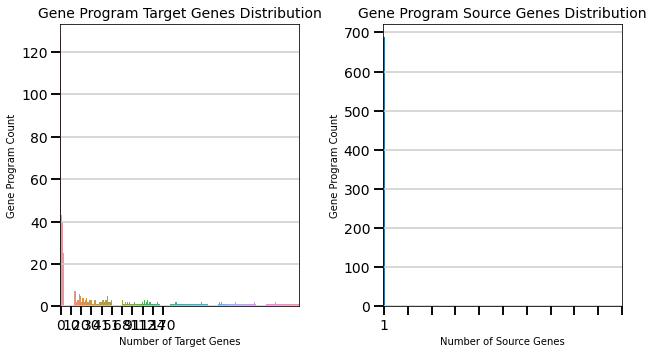

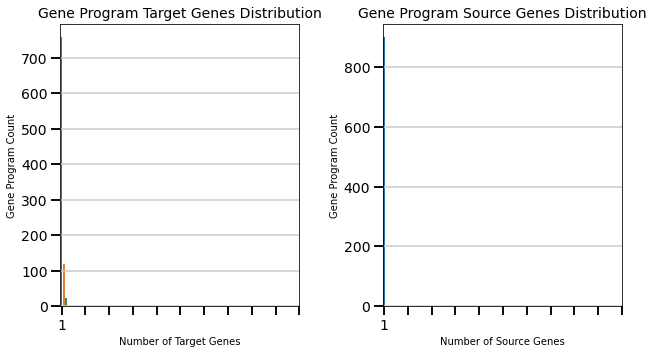

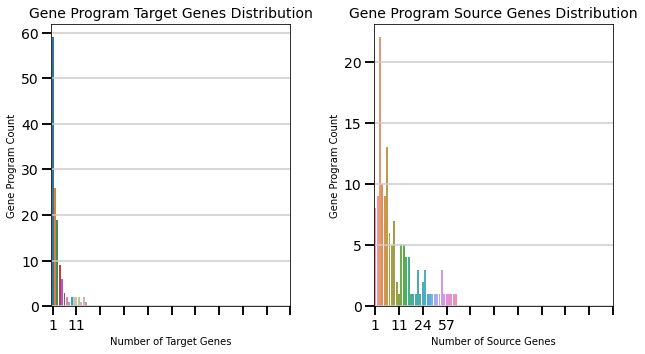

Removing GP 'CTF1_ligand_receptor_GP' as it is a subset of GP 'CTF1_ligand_targetgenes_GP'.
Removing GP 'LEP_ligand_receptor_GP' as it is a subset of GP 'LEP_ligand_targetgenes_GP'.
Removing GP 'IL4_ligand_receptor_GP' as it is a subset of GP 'IL4_ligand_targetgenes_GP'.
Removing GP 'IL12A_ligand_receptor_GP' as it is a subset of GP 'IL12A_ligand_targetgenes_GP'.
Removing GP 'IL23A_ligand_receptor_GP' as it is a subset of GP 'IL23A_ligand_targetgenes_GP'.
Removing GP 'CSF2_ligand_receptor_GP' as it is a subset of GP 'CSF2_ligand_targetgenes_GP'.
Removing GP 'IL21_ligand_receptor_GP' as it is a subset of GP 'IL21_ligand_targetgenes_GP'.
Removing GP 'TSLP_ligand_receptor_GP' as it is a subset of GP 'TSLP_ligand_targetgenes_GP'.
Removing GP 'GH2_ligand_receptor_GP' as it is a subset of GP 'GH2_ligand_targetgenes_GP'.
Removing GP 'EGF_ligand_receptor_GP' as it is a subset of GP 'EGF_ligand_targetgenes_GP'.
Removing GP 'IL10_ligand_receptor_GP' as it is a subset of GP 'IL10_ligand_targetgen

In [ ]:
compute_combined_benchmarking_metrics_for_all_models(
    dataset="vizgen_merfish_mouse_liver_sample",
    included_models=["autotalker",
                     "graphst",
                     "sagenet",
                     "expimap",
                     "scvi",
                     "pca"])

In [ ]:
compute_combined_benchmarking_metrics_for_all_models(dataset="starmap_plus_mouse_cns")

In [ ]:
compute_combined_benchmarking_metrics_for_all_models(dataset="starmap_plus_mouse_cns_sample")

In [ ]:
compute_combined_benchmarking_metrics_for_all_models(dataset="nanostring_cosmx_human_nsclc",
                                                     cell_type_key="cell_type")

In [ ]:
compute_combined_benchmarking_metrics_for_all_models(dataset="nanostring_cosmx_human_nsclc_sample")

#### 3.2.8 Summary

In [ ]:
df = pd.DataFrame()
datasets = ["seqfish_mouse_organogenesis_embryo2"]
timestamps = ["24022023_115320"]

for dataset, timestamp in zip(datasets, timestamps):
    dataset_artifact_folder_path = f"../../artifacts/{dataset}/method_benchmarking/comparison/{timestamp}"
    
    # Read complete benchmarking data from disk
    with open(f"{dataset_artifact_folder_path}/benchmarking_dict_list.pickle", "rb") as f:
        benchmarking_dict_list = pickle.load(f)
        dataset_df = pd.DataFrame(benchmarking_dict_list)
        dataset_df["dataset"] = dataset
        df = pd.concat([df, dataset_df])
df.head()

In [ ]:
unrolled_df = pd.melt(df, 
   id_vars = "model_name",
   value_vars = columns,
   var_name = "score_type", 
   value_name = "score")

In [ ]:
# Compute metric means over all runs
mean_df = df.groupby("model_name").mean()

columns = ["gcs",
           "mlami",
           "cas",
           "clisis",
           "gerr2",
           "cca"]

rows = ["autotalker",
        "deeplinc",
        "graphst",
        "sagenet",
        "pca",
        "scvi",
        "expimap"]

mean_df = mean_df[columns]
mean_df = mean_df.reindex(rows)

metric_ranks = []
for metric in mean_df.columns:
    mean_df[f"{metric}_rank"] = mean_df[metric].rank(ascending=False).astype(int)

mean_df["model_name"] = mean_df.index

unrolled_mean_df = pd.melt(mean_df, 
   id_vars = "model_name",
   value_vars = columns,
   var_name = "score_type", 
   value_name = "score")

plt.figure(figsize=(30, 15))
ax = sns.barplot(data=unrolled_mean_df,
                 x="score_type",
                 y="score",
                 hue="model_name",
                 palette="Accent")

plt.xticks(fontsize=30)
plt.yticks(fontsize=30)

# Iterate over the bars and annotate each one with the rank
for i, p in enumerate(ax.patches):
    model_idx, metric_idx = divmod(i, len(columns))
    rank = mean_df.loc[rows[model_idx], columns[metric_idx] + "_rank"]
    ax.annotate("%.0f" % rank,
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha="center",
                va="center",
                fontsize=20,
                color="gray",
                weight="bold",
                xytext=(0, 8),
                textcoords="offset points")

plt.xlabel("Metric",
           fontsize=30)
plt.ylabel("Metric Value (higher better)",
           fontsize=30)
plt.legend(loc=2,
           bbox_to_anchor=(1, 1),
           prop={"size": 28})
plt.title("Model Benchmarking Evaluation Metrics",
          fontsize=30,
          pad=20)
plt.savefig(f"{figure_folder_path}/eval_metrics.svg",
            dpi=300,
            bbox_inches="tight",
            format="svg")
plt.show()

##### 3.2.8.1 Metrics Ranking Plot

In [ ]:
mean_df_min_best = mean_df[["gcd", "cad", "arclisi", "germse"]] # lower values are better
mean_df_max_best = mean_df[["mlnmi", "cca", "ari", "clisi", "nmi", "asw", "ilasw", ]] # higher values are better
rank_df_min = mean_df_min_best.rank(method="max", ascending=True)
rank_df_max = mean_df_max_best.rank(method="max", ascending=False)
rank_df = pd.concat([rank_df_min, rank_df_max], axis=1)
rank_df = rank_df[columns]

In [ ]:
heatmap = sns.heatmap(rank_df, annot=True, cmap="YlGnBu")
fig = heatmap.get_figure()
plt.title("Method Benchmarking Metrics Ranking", fontsize=20, pad=25)
plt.xticks(rotation=45)
fig.savefig(f"{figure_folder_path}/metrics_ranking_{current_timestamp}.png",
            bbox_inches="tight")
plt.show()